# PCA from scracth on SMX 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Carreguem el Dataset

In [2]:
#Haptic_BL
SMX_h_BL = pd.read_csv('SMX_h_25.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])
SMX_h_BL.shape

(9, 9)

In [3]:
#Visual_BL
SMX_v_BL = pd.read_csv('SMX_v_1.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

In [4]:
#Haptic_UK
SMX_h_UK = pd.read_csv('SMX_h_25_UK.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])

In [5]:
#Visual_UK
SMX_v_UK = pd.read_csv('SMX_v_1_UK.csv', names=['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20'])
SMX_v_UK.shape

(8, 9)

## Molyneux

In [6]:
# Normalització de les files (descriptors) de les matrius de similitud.

SMX_h_BLn = SMX_h_BL / np.linalg.norm(SMX_h_BL, axis=-1)[:, np.newaxis]
SMX_v_BLn = SMX_v_BL / np.linalg.norm(SMX_v_BL, axis=-1)[:, np.newaxis]
SMX_h_UKn = SMX_h_UK / np.linalg.norm(SMX_h_UK, axis=-1)[:, np.newaxis]
SMX_v_UKn = SMX_v_UK / np.linalg.norm(SMX_v_UK, axis=-1)[:, np.newaxis]


In [7]:
# Producte de les matrius hàptica i visual. La visual està transposada perquè volem fer producte escalar de descriptors. 
# Els elements de la diagonal són la comparació dels descriptor hàptic i el visual de la mateixa figura. La component (i,j) 
# seria la comparació (via producte escalar) de la figura hàptica i amb la j. Per superar Moly cal que els valors de cada (i,i) 
# siguin més gran que els altres de la mateixa fila. El càlcul del ratio no està fet. 

#Cas BL
Moly_BL = np.matmul(np.array(SMX_h_BLn),SMX_v_BLn.T)
print(Moly_BL)

#Cas UK
Moly_UK = np.matmul(np.array(SMX_h_UKn),SMX_v_UKn.T)
print(Moly_UK)

          0         1         2         3         4         5         6  \
0  0.976629  0.122235  0.645301  0.506749  0.109516  0.520585  0.026482   
1  0.083153  0.947995  0.554751  0.009444  0.001469  0.057955  0.578030   
2  0.661798  0.600625  0.997769  0.034514  0.006994  0.641329  0.319457   
3  0.505600  0.025321  0.013994  0.945451  0.263506  0.016170  0.041336   
4  0.094677  0.017255  0.004231  0.282561  0.987809  0.012450  0.006581   
5  0.529521  0.228902  0.671034  0.027654  0.005634  0.974517  0.380209   
6  0.150942  0.415830  0.151213  0.334095  0.058905  0.474407  0.890655   
7  0.153132  0.042518  0.062337  0.214723  0.710822  0.035638  0.193208   
8  0.218210  0.010484  0.014073  0.523333  0.178685  0.012346  0.024201   

          7         8  
0  0.080713  0.288978  
1  0.028211  0.017654  
2  0.083086  0.028424  
3  0.097285  0.624385  
4  0.451772  0.314315  
5  0.067566  0.020746  
6  0.580273  0.143844  
7  0.844794  0.639530  
8  0.192956  0.843410  
         

## Standardize dataset

In [8]:
# Hem estandaritzat les dades restant-les de la mitjana i dividint entre la desviació. Fent això els resultats són millors, 
# s'hauria de pensar per què?

scaler = StandardScaler()

scaler.fit(SMX_h_BL)
SMX_h_BL_std  = scaler.transform(SMX_h_BL)

scaler.fit(SMX_v_BL)
SMX_v_BL_std  = scaler.transform(SMX_v_BL)

scaler.fit(SMX_h_UK)
SMX_h_UK_std  = scaler.transform(SMX_h_UK)

scaler.fit(SMX_v_UK)
SMX_v_UK_std  = scaler.transform(SMX_v_UK)

## Calculem la matriu de covariàncies

In [9]:
# Càlcul de les matrius de covariàncies a partir de les dades estandaritzades.

cov_mat_h_BL = np.cov(SMX_h_BL_std.T, bias = 0)

cov_mat_v_BL = np.cov(SMX_v_BL_std.T, bias = 0)

cov_mat_h_UK = np.cov(SMX_h_UK_std.T, bias = 0)

cov_mat_v_UK = np.cov(SMX_v_UK_std.T, bias = 0)

## Calculem els vectors i valors propis de la matriu de covariàncies

In [10]:
# Càlcul dels valors i vectors propis del Bl hàptic i visuals. Com volem visualitzar, és a dir, comparar, ho hem de 
# posar tot en la mateixa base per això només treballem amb el BL.

eigen_val_h, eigen_vectors_h = np.linalg.eig(cov_mat_h_BL)
eigen_val_v, eigen_vectors_v = np.linalg.eig(cov_mat_v_BL)

## PCA usant llibreria

In [11]:
pca = PCA(n_components = 2) # Establim amb quantes components volem treballar.
principalComponents = pca.fit_transform(SMX_h_BL_std) # Transformem les dades.
pca.explained_variance_ratio_ # Ens indica el % d'informació de cada component.
approximation = pca.inverse_transform(principalComponents) # Ens permet recuperar les dades a partir de la reducció de PCA feta.
print(SMX_h_BL_std)
print(approximation) # Aquí podem l'original amb la recuperada.


[[-0.58354271 -0.5435264  -0.59711281 -0.62478912 -0.47222616 -0.47028222
   1.89354724  1.07548746 -0.25558435]
 [-0.58354271 -0.5435264   0.06034651 -0.62478912 -0.47222616  2.63820615
  -0.70063513 -0.67555745 -0.58200693]
 [-0.5174493   0.94558702 -0.59711281 -0.62478912 -0.47222616  0.66070797
   1.38397571 -0.67555745 -0.58200693]
 [-0.43101945 -0.5435264  -0.59711281 -0.62478912  0.48045924 -0.51885235
  -0.70063513  2.34013101  0.33605658]
 [-0.58354271 -0.5435264  -0.59711281  1.14544672 -0.47222616 -0.51885235
  -0.70063513 -0.57341316  2.68221888]
 [-0.49638656  2.50915612  1.18946143 -0.62478912 -0.47222616 -0.51885235
   0.82807948 -0.67555745 -0.58200693]
 [ 2.32166232 -0.19358475  2.33286895 -0.62478912 -0.47222616 -0.2725324
  -0.70063513 -0.38858065 -0.51570234]
 [ 1.30484056 -0.5435264  -0.59711281  2.29089344 -0.35049414 -0.4806901
  -0.6311481  -0.67555745  0.08103894]
 [-0.43101945 -0.5435264  -0.59711281  0.31239456  2.70339185 -0.51885235
  -0.67191382  0.2486051

## Escollim la dimensionalitat més representativa

In [12]:
# Com volem visualitzar agafarem 2 components. 
n_components=2
top_eigen_vectors_h = eigen_vectors_h[:,:n_components]
top_eigen_vectors_v = eigen_vectors_v[:,:n_components]

## Passem les dades hàptiques i visuals a l'espai latent hàptic de dues dimensions.

In [13]:
transformed_ppal_h_BL = np.matmul(np.array(SMX_h_BL_std),top_eigen_vectors_h)
transformed_ppal_v_BL = np.matmul(np.array(SMX_v_BL_std),top_eigen_vectors_h)
transformed_ppal_h_UK = np.matmul(np.array(SMX_h_UK_std),top_eigen_vectors_h)
transformed_ppal_v_UK = np.matmul(np.array(SMX_v_UK_std),top_eigen_vectors_h)

## Normalitzem els vectors de l'espai latent de cada mode i mirem correlació

In [14]:
result_h_BL = transformed_ppal_h_BL / np.linalg.norm(transformed_ppal_h_BL, axis=-1)[:, np.newaxis]
result_v_BL = transformed_ppal_v_BL / np.linalg.norm(transformed_ppal_v_BL, axis=-1)[:, np.newaxis]
result_h_UK = transformed_ppal_h_UK / np.linalg.norm(transformed_ppal_h_UK, axis=-1)[:, np.newaxis]
result_v_UK = transformed_ppal_v_UK / np.linalg.norm(transformed_ppal_v_UK, axis=-1)[:, np.newaxis]

In [15]:
# Correlació de les matrius de similitud de BL a l'espai latent.
corr = 0
for i in range(len(result_v_BL)):
    corr += result_h_BL[i,:].dot(result_v_BL[i,:])
    
print(corr/len(result_v_BL))

0.9881810251547116


In [16]:
# Correlació de les matrius de similitud UK a l'espai latent.
corr = 0
for i in range(len(result_v_UK)):
    corr += result_h_UK[i,:].dot(result_v_UK[i,:])
    
print(corr/len(result_v_UK))

0.751349828414538


## Panderitzem les dades abans de fer el plot

In [17]:
principalSMX_h_BL = pd.DataFrame(data = transformed_ppal_h_BL
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
principalSMX_v_BL = pd.DataFrame(data = transformed_ppal_v_BL
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
principalSMX_h_UK = pd.DataFrame(data = transformed_ppal_h_UK
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
principalSMX_v_UK = pd.DataFrame(data = transformed_ppal_v_UK
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
objectes_BL =  ['cub10','lat00','lat05','lat15','lat20','lon00','lon05','lon15','lon20']

In [22]:
objectes_UK =  ['00-15','00-20','05-15','05-20','15-15','15-20','20-15','20-20']

## Plot

"for i, label in enumerate(objectes_UK):\n    plt.annotate(label, (principalSMX_h_UK.loc[i,'principal component 1']+0.1\n               , principalSMX_h_UK.loc[i,'principal component 2']))\n    \n\nfor i, label in enumerate(objectes_UK):\n    plt.annotate(label, (principalSMX_v_UK.loc[i,'principal component 1']-0.3\n              , principalSMX_v_UK.loc[i,'principal component 2']))\n\n    "

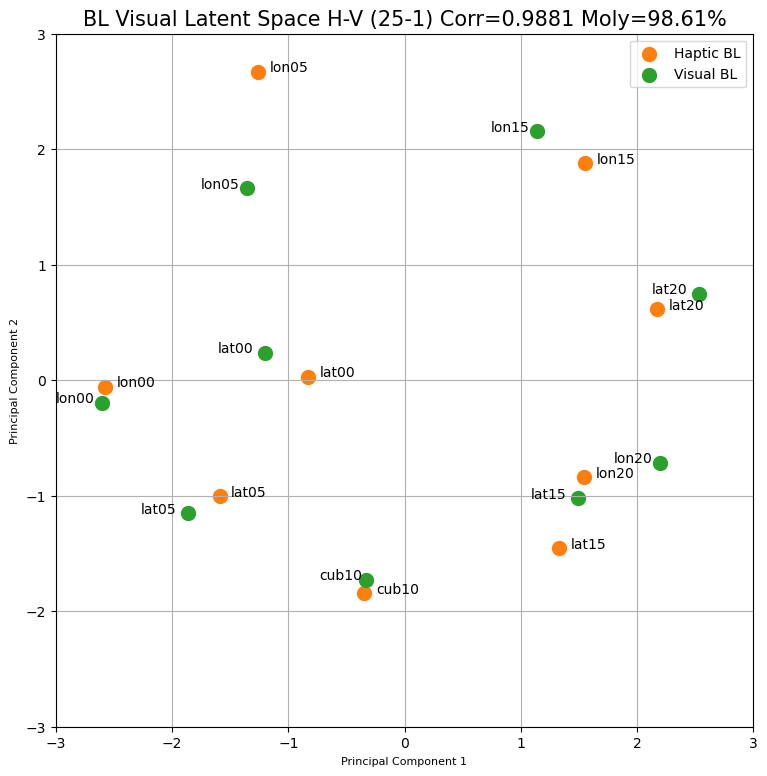

In [23]:
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_title('BL Visual Latent Space H-V (25-1) Corr=0.9881 Moly=98.61%', fontsize = 15)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)


ax.scatter(principalSMX_h_BL.loc[:,'principal component 1']
               , principalSMX_h_BL.loc[:,'principal component 2']
               , c = 'tab:orange', label = 'Haptic BL'
               , s = 100)



ax.scatter(principalSMX_v_BL.loc[:,'principal component 1']
           , principalSMX_v_BL.loc[:,'principal component 2']
               , c = 'tab:green', label = 'Visual BL'
               , s = 100)

'''ax.scatter(principalSMX_h_UK.loc[:,'principal component 1']
               , principalSMX_h_UK.loc[:,'principal component 2']
               , c = 'tab:red', label = 'Haptic UK'
               , s = 100)

ax.scatter(principalSMX_v_UK.loc[:,'principal component 1']
           , principalSMX_v_UK.loc[:,'principal component 2']
               , c = 'tab:blue', label = 'Visual UK'
               , s = 100)
'''



ax.legend()
ax.grid()

for i, label in enumerate(objectes_BL):
    plt.annotate(label, (principalSMX_h_BL.loc[i,'principal component 1']+0.1
               , principalSMX_h_BL.loc[i,'principal component 2']))

for i, label in enumerate(objectes_BL):
    plt.annotate(label, (principalSMX_v_BL.loc[i,'principal component 1']-0.4
               , principalSMX_v_BL.loc[i,'principal component 2']))
    
'''for i, label in enumerate(objectes_UK):
    plt.annotate(label, (principalSMX_h_UK.loc[i,'principal component 1']+0.1
               , principalSMX_h_UK.loc[i,'principal component 2']))
    

for i, label in enumerate(objectes_UK):
    plt.annotate(label, (principalSMX_v_UK.loc[i,'principal component 1']-0.3
              , principalSMX_v_UK.loc[i,'principal component 2']))

    '''

